<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis Term I and II Project : IPL:"Hari Iyer March 2019 Cohort"

## Table of Contents

1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

<a id=section1></a>
### 1.Problem Statement

<a id=section101></a> 
### 1.1. Introduction



###                                                              Indian Premier League 
A professional T20 league, started in 2008 by BCCI that happens every Year in India, in the months of April and May.
A tournament that aims to promote Cricket in India and to provide a platform for the local players to play at a much higher level, to get the best possible environment for nurturing themselves into professionals and to provide enormous entertainment to the Cricket Fans in India and all over the world.. 
It's the most watched Cricket League in the world and, every season contributes about ₹5–10 bn to GDP of Indian Economy.

#### I want to create an Universal Premier League Cricket Cup for World Peace. The idea is to motivate world peace by creating teams across world . Each team will consist of members mixed from many different countries.
#### For this world cup , I want to select the 14 membered squad of  team IPL consisting of the best multinational players from each IPL teams who played IPL matches from 2007 till 2018.


<a id=section102></a>
### Data Source and Data Set

I have picked up my data from :

https://github.com/insaid2018/Term-1/blob/master/Data/Projects/matches.csv

https://github.com/insaid2018/Term-1/blob/master/Data/Projects/deliveries.csv

raw file path:

https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv

https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv



<a id=section2></a>
### 2.Data Loading and Description
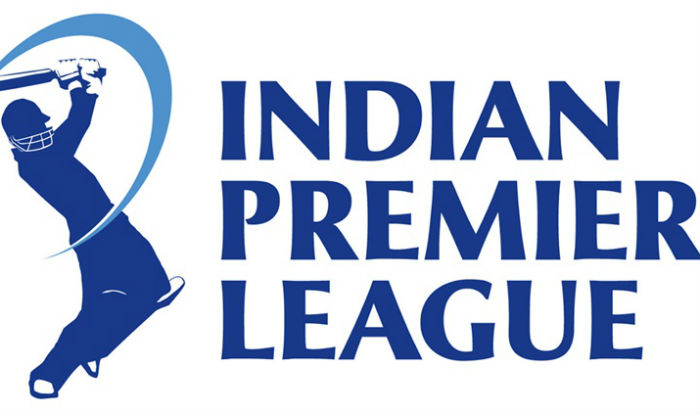

The dataset contains 2 files: deliveries.csv and matches.csv.

matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.
matches_data has 696 rows and 18 columns

deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

Below tables show names of all the columns and their respective description for matches and deliveries.


## matches table

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Id            | Match Identity                                            | 
| season     | Whether passenger survived or not                         |  
| city        | Class of ticket                                           | 
| date          | Name of passenger                                         |   
| team1          | Sex of passenger                                          |
| team2           | Age of passenger                                          |
| toss_winner         | Number of sibling and/or spouse travelling with passenger |
| toss_decision         | Number of parent and/or children travelling with passenger|
| result       | Ticket number                                             |
| dl_applied          | Price of ticket                                           |
| winner         | Cabin number                                              |
| win_by_runs           | Match Identity                                            | 
| win_by_wickets    | Whether passenger survived or not                         |  
| player_of_match       | Class of ticket                                           | 
| venue          | Name of passenger                                         |   
| umpire1          | Sex of passenger                                          |
| umpire2           | Age of passenger                                          |
| umpire3         | Number of sibling and/or spouse travelling with passenger |


## deliveries table

'match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'
       
| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| match_id      | Passenger Identity                                        | 
| inning        | Whether passenger survived or not                         |  
| batting_team        | Class of ticket                                           | 
| bowling_team         | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from subprocess import check_output
matches_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
deliveries_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv")

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [7]:
matches_data.shape


(696, 18)

matches_data has 696 rows and 18 columns.

In [5]:
deliveries_data.shape

(164750, 21)

deliveries_data has 164750 rows and 21 columns

In [6]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')